In [38]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import randint
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor , RandomForestClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
# reading
data = pd.read_csv("/content/drive/MyDrive/Colab Notebook(WBS)/Machine_learning(week8&9)/mushroom competition/train_1.csv") 


In [19]:
data

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


In [20]:
#check null values in Dataset
data.isnull().sum()

cap.shape                 0
cap.color                 0
bruises                   0
stalk.color.above.ring    0
stalk.color.below.ring    0
population                0
Id                        0
poisonous                 0
dtype: int64

In [21]:
#Convert categorical variable into dummy/indicator variables.
OneHotEn = pd.get_dummies(data, drop_first=True)
OneHotEn.head()

,bruises,Id,poisonous,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,...,stalk.color.below.ring_n,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y
0,False,6573,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,True,4426,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,False,7018,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,False,5789,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,True,6187,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
#import seaborn as sns 
#sns.pairplot(OneHotEn)

In [23]:
OneHotEn=OneHotEn.set_index('Id') #for reseting index as Id
OneHotEn.head()

,bruises,poisonous,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,cap.color_g,...,stalk.color.below.ring_n,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y
Id,,,,,,,,,,,,,,,,,,,,,
6573,False,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4426,True,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
7018,False,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5789,False,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
6187,True,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
# Split data features into dependent and independent
# X is Independent variables
# y is dependent variables
#drop the traget column
X= OneHotEn
y= X.pop('poisonous')

To check variance

In [25]:
X.var().sort_values()

cap.shape_c                 0.000154
stalk.color.above.ring_y    0.001076
cap.color_r                 0.001997
cap.color_u                 0.002150
stalk.color.below.ring_y    0.002915
cap.shape_s                 0.004290
stalk.color.above.ring_c    0.004443
stalk.color.below.ring_c    0.004443
cap.color_c                 0.005205
stalk.color.above.ring_e    0.011860
stalk.color.below.ring_e    0.012160
cap.color_p                 0.017681
stalk.color.below.ring_o    0.023431
stalk.color.above.ring_o    0.023431
population_c                0.040248
population_n                0.046821
stalk.color.above.ring_n    0.052059
stalk.color.below.ring_n    0.060592
stalk.color.above.ring_g    0.064722
stalk.color.below.ring_g    0.066704
cap.shape_k                 0.090272
cap.color_w                 0.110615
cap.color_y                 0.113474
population_s                0.129467
cap.color_e                 0.150282
population_y                0.168337
cap.color_g                 0.176480
s

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 99999)

#### Collinearity

Features that have a perfect (or extremely high) correlation with each other can be considered the same feature.Let's first explore the pairwise correlations between all features.

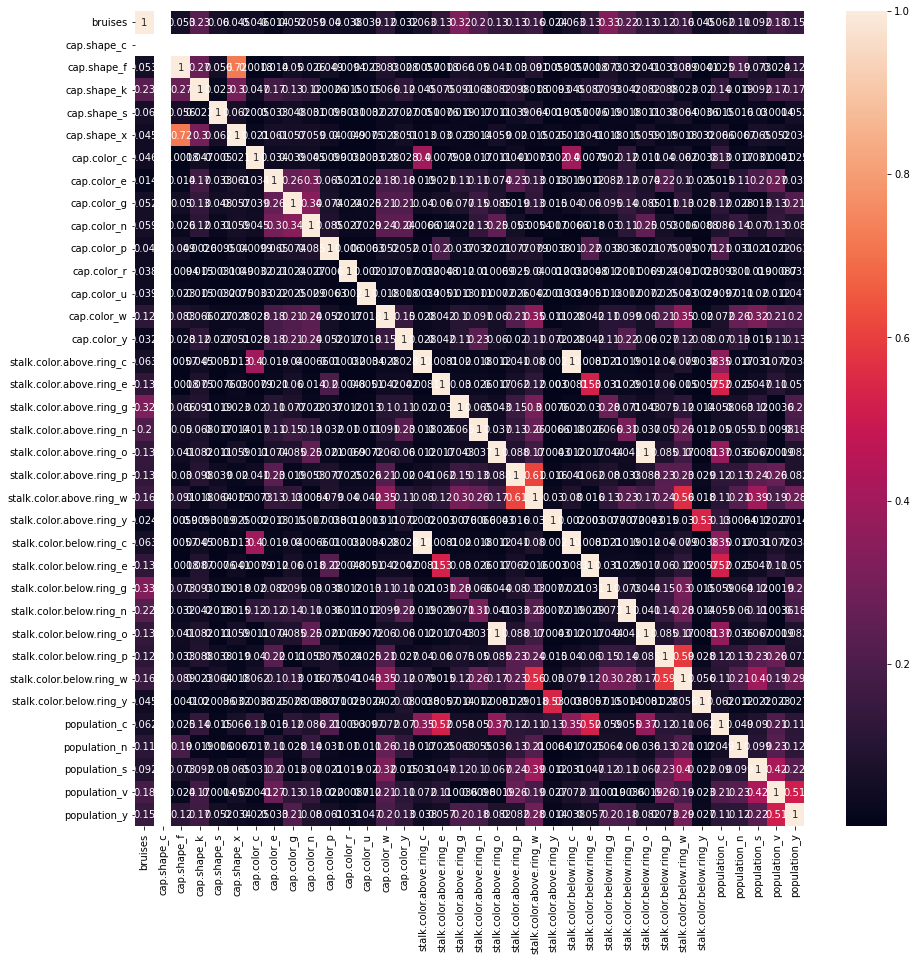

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
corrMatrix = X_train.corr().abs()
sn.heatmap(corrMatrix, annot=True);

In [28]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
from sklearn import metrics
y_test_pred = RF.predict(X_test)
print("Score : {}".format(RF.score(X_test, y_test))) #n_estimators=150, random_state=0
print("Mean absolute error : {}".format(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R-square Value : {}".format(metrics.r2_score(y_test, y_test_pred)))

Score : 0.953076923076923
Mean absolute error : 0.04692307692307692
R-square Value : 0.8122792565027601


In [30]:
XGB = xgb.XGBClassifier(n_estimators=15,seed=12345)
XGB.fit(X_train,y_train)

XGBClassifier(n_estimators=15, seed=12345)

In [31]:
y_test_pred = XGB.predict(X_test)
print("Score : {}".format(XGB.score(X_test, y_test)))
print("Mean absolute error : {}".format(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R-square Value : {}".format(metrics.r2_score(y_test, y_test_pred)))

Score : 0.8823076923076923
Mean absolute error : 0.1176923076923077
R-square Value : 0.5291594466380706


###Ignore this diff models

In [39]:
# creating 5 different models
RF = RandomForestRegressor().fit(X_train, y_train)
DT = DecisionTreeRegressor().fit(X_train, y_train)
GBR = GradientBoostingRegressor().fit(X_train, y_train)
LR = LinearRegression().fit(X_train, y_train)
XGB = XGBRegressor().fit(X_train, y_train)

[14:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
# the evaluation metrics
models = [LR, DT, RF, GBR, XGB]
RMSE = [mean_squared_error(y_test, mod.predict(X_test))**0.5 for mod in models]
MAPE = [mean_absolute_percentage_error(y_test, mod.predict(X_test)) for mod in models]
R2_Score = [r2_score(y_test, mod.predict(X_test)) for mod in models]

In [41]:
# comparing 5 models
Models = ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting','XgBoost']
evaluation = pd.DataFrame({'Models':Models,'RMSE':RMSE,'MAPE':MAPE, 'R2_Score':R2_Score})

In [42]:
evaluation

,Models,RMSE,MAPE,R2_Score
0,Linear Regression,0.303827,5.619602e+14,0.630702
1,Decision Tree,0.182319,1.313717e+14,0.867019
2,Random Forest,0.182598,1.319645e+14,0.866612
3,Gradient Boosting,0.223970,2.873852e+14,0.799320
4,XgBoost,0.225484,2.889261e+14,0.796597


confusion_matrix

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix= confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)
confusion_matrix

array([[630,  28],
       [125, 517]])

In [44]:
from sklearn.metrics import classification_report

classification_report(y_test, y_test_pred,labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

'              precision    recall  f1-score   support\n\n           0       0.83      0.96      0.89       658\n           1       0.95      0.81      0.87       642\n\n    accuracy                           0.88      1300\n   macro avg       0.89      0.88      0.88      1300\nweighted avg       0.89      0.88      0.88      1300\n'

In [45]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       658
           1       0.95      0.81      0.87       642

    accuracy                           0.88      1300
   macro avg       0.89      0.88      0.88      1300
weighted avg       0.89      0.88      0.88      1300



In [47]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebook(WBS)/Machine_learning(week8&9)/mushroom competition/test.csv")

In [48]:
test_data.set_index("Id", inplace=True)  #reset index as Id

In [49]:
OneHotEn1 = pd.get_dummies(test_data, drop_first=True)
OneHotEn1.head()

,bruises,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,cap.color_g,cap.color_n,...,stalk.color.below.ring_n,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y
Id,,,,,,,,,,,,,,,,,,,,,
5165,True,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4281,False,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
231,True,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3890,False,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1521,False,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [50]:
# To predict test data using XGB full pipeline
test_preds = RF.predict(OneHotEn1)  


In [51]:
# Two cloumns are needed to make dataframe 
result = pd.DataFrame({'Id': OneHotEn1.index,             
                       'poisonous': test_preds})

In [52]:
result

,Id,poisonous
0,5165,0.803445
1,4281,1.000000
2,231,0.000000
3,3890,0.000000
4,1521,1.000000
...,...,...
1620,983,1.000000
1621,7055,0.000000
1622,7456,1.000000
1623,5132,0.000000


In [53]:
# To covert dataframe to CSV
result.to_csv('mycodibles.csv', index=False)

In [54]:
# For download CSV file
from google.colab import files
files.download("mycodibles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>